本プログラムはDAI(@never_be_a_pm) さんの以下サイトのプログラムをベースに作成したものとなります。
公開にあたっては、DAIさんの許可を得ております。本プログラムの二次使用に関してはDAIさんに確認下さい（私への確認は不要です）

https://review-of-my-life.blogspot.jp/2017/10/python-web-scraping-data-collection-analysis.html

Python及び使用しているライブラリのバージョンの確認

In [1]:
import platform
print("python " + platform.python_version())
import pkg_resources
pkglist = ['selenium', 'pandas', 'numpy', 'matplotlib']
for dist in pkg_resources.working_set:
    if dist.project_name in pkglist:
        print(dist.project_name, dist.version)

python 3.6.1
selenium 3.8.0
pandas 0.20.1
numpy 1.14.5
matplotlib 2.1.2


必要ライブラリのインポート

In [2]:
from selenium import webdriver  
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

ベースになるcsvファイル作成

In [3]:
%%bash
echo "title,date,bookmarks" > trend.csv

スクレイピングのメインスクリプト

In [8]:
# Access to page
browser = webdriver.PhantomJS()  # DO NOT FORGET to set path
url = "http://b.hatena.ne.jp/search/text?q=https%3A%2F%2Fkaraage.hatenadiary.jp%2F&users=1"
browser.get(url)
df = pd.read_csv('trend.csv', index_col=0)

page = 1 #This number shows the number of current page later

while True: #continue until getting the last page
    print(len(browser.find_elements_by_css_selector(".centerarticle-pager-next")))
    if len(browser.find_elements_by_css_selector(".centerarticle-pager-next")) > 0:
        print("######################page: {} ########################".format(page))
        print("Starting to get posts...")
        #get all posts in a page
        posts = browser.find_elements_by_css_selector(".centerarticle-entry")
        for post in posts:
            title = post.find_element_by_css_selector("h3").text
            date = post.find_element_by_css_selector(".entry-contents-date").text
            bookmarks = post.find_element_by_css_selector(".centerarticle-users").text
            se = pd.Series([title, date, bookmarks],['title','date','bookmarks'])
            print(title + " " + date + " bookmarks=" + bookmarks)
            df = df.append(se, ignore_index=True)

        #after getting all posts in a page, click pager next and then get next all posts again

        btn = browser.find_element_by_css_selector(".centerarticle-pager-next")
        btn = btn.find_element_by_css_selector("a.js-keyboard-openable").get_attribute("href")

        print("next url:{}".format(btn))
        browser.get(btn)
        page+=1
        browser.implicitly_wait(10)
        print("Moving to next page......")
        time.sleep(10)
    else: #if no pager exist, stop.
        print("no pager exist anymore")
        break
df.to_csv("trend1.csv")
print("DONE")

1
######################page: 1 ########################
Starting to get posts...
編集・リアルタイムプレビューが一体のシンプルなMarkdownエディタ「Typora」が良い感じ - karaage. [からあげ] 2018/12/28 bookmarks=3 users
ディープラーニングの画像認識性能向上のための泥臭いテクニック - karaage. [からあげ] 2018/12/26 bookmarks=8 users
愛知県常滑市のINAXライブミュージアムで「光るどろだんごづくり」体験してきた - karaage. [からあげ] 2018/12/24 bookmarks=1 users
IoTLT名古屋で「AI x IoTデバイスとしての Google Vision Kitの可能性と使いこなし」という題で発表しました - karaage. [からあげ] 2018/12/21 bookmarks=1 users
ヒートテックが肌に合わずに身体が痒いので色々対策してみた - karaage. [からあげ] 2018/12/19 bookmarks=8 users
Google Colaboratoryを便利に使うためのTIPSまとめ - karaage. [からあげ] 2018/12/17 bookmarks=157 users
高かったけど今年思い切って買って良かったもの（2018年版） - karaage. [からあげ] 2018/12/14 bookmarks=18 users
サークルの部室をスマートロック化したお話 - Qiita 2018/12/13 bookmarks=1 users
日経Linux2019年1月号に記事掲載されました＆特別付録が豪華ラズパイ特集！ - karaage. [からあげ] 2018/12/12 bookmarks=3 users
個人的に注目しているAdvent Calendarまとめ（2018年版） - karaage. [からあげ] 2018/12/10 bookmarks=25 users
Ogaki Mini Maker Faire 2018 #OMMF2018 レポートまとめ - karaage. [からあげ] 2018/12/

バルミューダのDCモーター高級扇風機「GreenFan Japan」の風が静かで心地よい - karaage. [からあげ] 2018/06/01 bookmarks=3 users
有松の古い町並みでお散歩写真 - karaage. [からあげ] 2018/05/30 bookmarks=5 users
VRゴーグル「Oculus Go」購入・セットアップからおすすめコンテンツ・便利に使うTIPS情報まとめ - karaage. [からあげ] 2018/05/28 bookmarks=137 users
トルコと日本の友好の話「エルトゥールル号のことを忘れない」 - karaage. [からあげ] 2018/05/25 bookmarks=4 users
Intel Movidius + TensorFlowでRaspberry Piでもサクサク画像認識 - karaage. [からあげ] 2018/05/23 bookmarks=17 users
「karaage.」がまだ「KARAAGE」だったころの黒歴史を大公開 - karaage. [からあげ] 2018/05/21 bookmarks=18 users
妻の家庭に伝わる貝（あさり）の裏を箸でコチョコチョすると貝柱がめっちゃ綺麗にとれる秘技 - karaage. [からあげ] 2018/05/18 bookmarks=24 users
中判フィルムカメラをRaspberry Piを使ってデジタルカメラ化する「ZANGI BRONICA（ザンギブロニカ）」を開発中です - karaage. [からあげ] 2018/05/16 bookmarks=11 users
出版業界のソフトウェア化と出版社の未来 - karaage. [からあげ] 2018/05/14 bookmarks=28 users
紙の書籍から電子書籍に移行したら本の読み方が変わった - karaage. [からあげ] 2018/05/11 bookmarks=38 users
ディープラーニングで自分の身体を楽器にする「ヒューマンシーケンサー2.0」の紹介 - karaage. [からあげ] 2018/05/09 bookmarks=6 users
パンダのインフレが発生する和歌山のアドベンチャーワールドで望遠レンズが大活躍でした - ka

アスファルトがタイヤを切りつけるまで、いったいどれだけの時間が必要なの？GET WILD SONG MAFIA全36曲徹底分析 〜Get Wild and Analysis 2〜 - karaage. [からあげ] 2017/11/06 bookmarks=26 users
京都ラーメン激戦区一乗寺ラーメン通りの「中華そば 高安」さんでラーメンとからあげを同時に食して昇天 - karaage. [からあげ] 2017/11/01 bookmarks=9 users
3DプリンタでRaspberry Pi 3用のいい感じのケースを造形してみた - karaage. [からあげ] 2017/10/30 bookmarks=15 users
京都駅付近のラーメン屋2大巨頭「新福菜館本店」と「第一旭」のどちらでラーメンを食べるべきか - karaage. [からあげ] 2017/10/27 bookmarks=52 users
ハワイにセントレアから行くとき準備しておくと良さそうなことまとめ - karaage. [からあげ] 2017/10/23 bookmarks=5 users
ボンサイラボ製の3Dプリンタ「BS01」のセットアップ方法・注意点 - karaage. [からあげ] 2017/10/20 bookmarks=12 users
壁掛けの電波時計が壊れたので電波系ブロガーとして分解・修理にチャレンジしたら奇跡が舞い降りた話 - karaage. [からあげ] 2017/10/18 bookmarks=20 users
プロキシサーバを手軽に設定する方法 （Mac/Linux/Raspberry Pi） - karaage. [からあげ] 2017/10/16 bookmarks=1 users
技術的なことをブログに書くときに気をつけていること - karaage. [からあげ] 2017/10/16 bookmarks=18 users
大阪万博公園「NIFREL（ニフレル）」でアートと動物に触れてきた - karaage. [からあげ] 2017/10/13 bookmarks=8 users
PFNのエンジニアさんが公開してるJupyter Notebookが実践的なハンズオン形式でディープラーニング（Chainer）の入門に最適 - karaage.

アフロの男がモン・サン＝ミシェルに向かって全力疾走する動画 - karaage. [からあげ] 2017/04/10 bookmarks=2 users
Raspberry Piで子供の見守りリモートカメラ「見守るくん」を作ってみた - karaage. [からあげ] 2017/04/06 bookmarks=79 users
瀬戸蔵ロボットアカデミー「春休みロボットフェスタ」で動くリアルな鉄人28号を見てきた - karaage. [からあげ] 2017/04/03 bookmarks=8 users
無料の仮想化環境構築ソフト「VirtualBox」を使ってMacでLinux（Ubuntu）を試す - karaage. [からあげ] 2017/03/30 bookmarks=5 users
家に眠っていたApple TVとオーディオ機器を組み合わせてホームシアターを構築してみた - karaage. [からあげ] 2017/03/27 bookmarks=11 users
Synology社の最新のNAS（DiskStation DS216j）に買い換えたら今まで自分が知っていたNASの概念を超えていたのでセットアップから便利な使い方まで紹介 - karaage. [からあげ] 2017/03/23 bookmarks=458 users
オリンパスの中望遠単焦点レンズの名機 M.ZUIKO DIGITAL 45mm F1.8 1本で動物園スナップにチャレンジ #SH_WALK Vol.4 - karaage. [からあげ] 2017/03/20 bookmarks=4 users
マルチプラットフォームに対応した無料RAW現像ソフト「RawTherapee」と「darktable」をMacで試して比較してみた - karaage. [からあげ] 2017/03/15 bookmarks=13 users
三重のみそカツ発祥のお店「カトレア」で食べたみそカツがとても美味しかった - karaage. [からあげ] 2017/03/13 bookmarks=6 users
ラグーナテンボスの「映画ドラえもん 南極カチコチ大冒険」でドラえもんづくしを堪能してきました - karaage. [からあげ] 2017/03/09 bookmarks=5 users
動画か

ロボット関係の情報まとめ - karaage. [からあげ] 2016/08/21 bookmarks=1 users
シン・ゴジラの熱量高いレビュー・考察まとめ - karaage. [からあげ] 2016/08/21 bookmarks=35 users
Apple純正カナル式ヘッドフォンのイヤーピースの格安代替品 - karaage. [からあげ] 2016/08/17 bookmarks=1 users
蒲郡市の竹島水族館を子供の目線で楽しんで来ました - karaage. [からあげ] 2016/08/17 bookmarks=8 users
100円ショップで始める水耕栽培（生長〜収穫編） - karaage. [からあげ] 2016/08/15 bookmarks=1 users
男が読んでも面白いオススメ少女漫画 - karaage. [からあげ] 2016/08/10 bookmarks=1 users
IoTミニ四駆製作キット「MKZ4」を作ってみました - karaage. [からあげ] 2016/08/08 bookmarks=19 users
子供向けのプログラミング教育ツールのまとめ - karaage. [からあげ] 2016/08/07 bookmarks=4 users
Chainerのcaffeモデルの読み込みを爆速にした - karaage. [からあげ] 2016/08/01 bookmarks=3 users
next url:http://b.hatena.ne.jp/search/text?page=10&q=https%3A%2F%2Fkaraage.hatenadiary.jp%2F&safe=on&sort=recent&users=1
Moving to next page......
1
######################page: 10 ########################
Starting to get posts...
100円ショップで始める水耕栽培（定植編） - karaage. [からあげ] 2016/07/29 bookmarks=1 users
Python+OpenCVで30行で顔認識する方法 - karaage. [からあげ] 2016/07/27 bookmarks=

岡崎魚市場「平の食堂」で激うまカスタム海鮮丼を食す - karaage. [からあげ] 2016/02/20 bookmarks=4 users
Raspberry PiのGPIO制御ライブラリ比較 - karaage. [からあげ] 2016/02/19 bookmarks=14 users
色々な画角の単焦点レンズで切り取るひな祭り - karaage. [からあげ] 2016/02/18 bookmarks=36 users
SHUTTER HOLICさんの写真展「SH PEOPLE」参加しています - karaage. [からあげ] 2016/02/17 bookmarks=8 users
NEOPASA岡崎爆誕 緊急からあげレビューするしかないだろうが！ - karaage. [からあげ] 2016/02/16 bookmarks=5 users
バレンタインなのでスイーツレビュ（侍のプリンと手作りチョコ） - karaage. [からあげ] 2016/02/15 bookmarks=1 users
写真にExif情報を基に自動で日付（タイムスタンプ）を入れるソフトを妻のために作りました - karaage. [からあげ] 2016/02/08 bookmarks=55 users
新宿ナイトフォトウォーク 〜広角単焦点レンズで玉ボケ写真〜 - karaage. [からあげ] 2016/02/03 bookmarks=3 users
技術の力ではてなブログに12日で1000記事更新したら大変なことになりました - karaage. [からあげ] 2016/02/01 bookmarks=14 users
4枚の写真を1枚に結合するソフトを一瞬で作ったら妻から尊敬されました - karaage. [からあげ] 2016/01/29 bookmarks=17 users
pythonではてなブログに投稿するスクリプト「post-hatena」作った - karaage. [からあげ] 2016/01/27 bookmarks=7 users
マルコフ連鎖を使ってブログの記事を自動生成してみた - karaage. [からあげ] 2016/01/27 bookmarks=391 users
Git(GitHub)おじさんに俺はなるBefore Git, Afte

Raspberry PiとArduino間でUSB経由のシリアル通信 - karaage. [からあげ] 2015/09/18 bookmarks=6 users
味噌パウダーとイカとキュウリの組み合わせが最高！ - karaage. [からあげ] 2015/09/16 bookmarks=1 users
味噌パウダーは万能か？ - karaage. [からあげ] 2015/09/15 bookmarks=2 users
nakanoiseさん（元キーゲイザー）のシューゲイザーっぷりが最高にロック - karaage. [からあげ] 2015/09/14 bookmarks=1 users
世界よこれがブロガーだ！ - karaage. [からあげ] 2015/09/12 bookmarks=20 users
Raspberry Pi用USB WiFiモジュールの電力を測定して比較してみた - karaage. [からあげ] 2015/09/11 bookmarks=4 users
Raspberry Piで作ったもの・やったことまとめ - karaage. [からあげ] 2015/09/10 bookmarks=54 users
スティーブといえば？ジョブズ？違うだろウォズニアックだよ！ - karaage. [からあげ] 2015/09/08 bookmarks=8 users
ライザップするミクをRaspberry Piで作る - karaage. [からあげ] 2015/09/05 bookmarks=1 users
Raspberry Pi 2でロボット製作（ロボット組み立て・アプリ編） - karaage. [からあげ] 2015/09/02 bookmarks=42 users
フランスで撮ったやってしまった感じの写真 - karaage. [からあげ] 2015/09/01 bookmarks=7 users
Lightroomの良質な無料プリセットを15分で100個以上入手する方法 - karaage. [からあげ] 2015/08/30 bookmarks=98 users
はてなTシャツ今年も貰えなかった＆今週のお題のタイミングが相変わらず悪過ぎる件 - karaage. [からあげ] 2015/08/28 bookmarks=2 users


メインのカメラ機材まとめ(2015年版) - karaage. [からあげ] 2015/03/22 bookmarks=30 users
1000円とiPhoneでVR体験 ハコスコ - karaage. [からあげ] 2015/03/18 bookmarks=1 users
はてなブログさんにのせられてはてなブログProを1年契約更新しました - karaage. [からあげ] 2015/03/17 bookmarks=3 users
薫製作り方初心者向け 〜2000円以下でキットから食材まで全部揃えて即日完成〜 - karaage. [からあげ] 2015/03/15 bookmarks=32 users
はてなブログのスマホデザインをコピペだけでプチカスタマイズ - karaage. [からあげ] 2015/03/14 bookmarks=8 users
フィルムライクな加工ができるiPhoneカメラアプリ「VSCO」使ってみました - karaage. [からあげ] 2015/03/13 bookmarks=2 users
はてなフォトライフ入門（メリット・デメリット・便利な使い方） - karaage. [からあげ] 2015/03/12 bookmarks=11 users
非売品のウルフィPMF（ペーパームービングフィギュア）を組み立ててみました - karaage. [からあげ] 2015/03/11 bookmarks=1 users
アマチュアカメラマンだけどリバーサルフィルムで写真撮ってみました - karaage. [からあげ] 2015/03/10 bookmarks=23 users
ブログ記事に影響を受けてもつ鍋を食べた上に記事をパクるという暴挙にでました - karaage. [からあげ] 2015/03/08 bookmarks=3 users
ゲストブロガーとして変デジ研究所に寄稿しました - karaage. [からあげ] 2015/03/07 bookmarks=1 users
夫婦でGoogleカレンダ共有してiPhoneカレンダと同期したら超絶便利 - karaage. [からあげ] 2015/02/24 bookmarks=9 users
OM-D E-M5のムック本を一通り揃えてしまったので全てレビュ - karaag

デジタルカメラを自作してみよう【Raspberry Pi Setup編】 - karaage. [からあげ] 2014/08/31 bookmarks=213 users
WEB漫画『ネコマン』 第28-30話 - karaage. [からあげ] 2014/08/28 bookmarks=1 users
MacとiPadと無料アプリでWeb漫画を描く方法 - karaage. [からあげ] 2014/08/27 bookmarks=2 users
半年ぶりのからあげレビューだろうが！ - karaage. [からあげ] 2014/08/26 bookmarks=1 users
モノ作りの祭典 Ogaki Mini Maker Faire 2014行ってきました - karaage. [からあげ] 2014/08/24 bookmarks=2 users
えのすい（江ノ島水族館）写真 - karaage. [からあげ] 2014/08/20 bookmarks=8 users
江ノ島でえの散歩写真 - karaage. [からあげ] 2014/08/20 bookmarks=43 users
モノ作りに興味ある人集まれ！Maker入門 - karaage. [からあげ] 2014/08/19 bookmarks=69 users
マタタビさんがフルコース男子ご飯してくれました - karaage. [からあげ] 2014/08/19 bookmarks=4 users
Macで自作ソフトのアイコンを作成して適用する方法 - karaage. [からあげ] 2014/08/16 bookmarks=2 users
「7つの習慣」？そんなもん有り難がってる場合じゃねぇ！俺たちには「竜ヶ岩洞物語」があるだろう - karaage. [からあげ] 2014/08/16 bookmarks=2 users
なかよしのピンホールカメラをRaspberryPiを使ってデジカメ化 - karaage. [からあげ] 2014/08/12 bookmarks=96 users
NATURA CLASSICAでフィルムカメラ入門 - karaage. [からあげ] 2014/08/12 bookmarks=3 users
なかよしのピンホールカメラをミラーレスカメラ使ってデジタル化してみ

Moving to next page......
0
no pager exist anymore
DONE


気になれば以下を手動で編集
- 何故か1個目のデータだけ読み込めないので、手動で`trend1.csv`に書き込む  
- 他のサイトの記事を手動で削除

データを読み込んで整形する

In [9]:
df = pd.read_csv("trend1.csv")
data = df.drop("Unnamed: 0", axis = 1)
data = data.drop(0)
data.head()

,date,bookmarks,title
1,2018/12/26,8 users,ディープラーニングの画像認識性能向上のための泥臭いテクニック - karaage. [からあげ]
2,2018/12/24,1 users,愛知県常滑市のINAXライブミュージアムで「光るどろだんごづくり」体験してきた - kara...
3,2018/12/21,1 users,IoTLT名古屋で「AI x IoTデバイスとしての Google Vision Kitの可...
4,2018/12/19,8 users,ヒートテックが肌に合わずに身体が痒いので色々対策してみた - karaage. [からあげ]
5,2018/12/17,157 users,Google Colaboratoryを便利に使うためのTIPSまとめ - karaage....


ブックマークを x users -> x に変換

In [10]:
data['bookmarks'] = data['bookmarks'].str.replace('users', '')
data['bookmarks'] = data['bookmarks'].astype('int')
data.head()

,date,bookmarks,title
1,2018/12/26,8,ディープラーニングの画像認識性能向上のための泥臭いテクニック - karaage. [からあげ]
2,2018/12/24,1,愛知県常滑市のINAXライブミュージアムで「光るどろだんごづくり」体験してきた - kara...
3,2018/12/21,1,IoTLT名古屋で「AI x IoTデバイスとしての Google Vision Kitの可...
4,2018/12/19,8,ヒートテックが肌に合わずに身体が痒いので色々対策してみた - karaage. [からあげ]
5,2018/12/17,157,Google Colaboratoryを便利に使うためのTIPSまとめ - karaage....


ブックマークの多い順にソートする

In [11]:
sort_data = data.sort_values(by=["bookmarks"], ascending=False)
sort_data.head()

,date,bookmarks,title
104,2018/05/02,1450,私の会社の機械学習経験ゼロの「ディープラーニングおじさん」が会社のAI戦略を動かすまで - ...
142,2018/01/31,1249,東京大学の松尾研究室が無料公開している「Deep Learning基礎講座演習コンテンツ」の...
157,2017/12/27,840,073000
291,2017/01/25,777,収納下手を克服するため妻監修のもと無印良品中心に理想の収納システムを構築しました - kar...
39,2018/09/24,721,Amazonで全部揃えるおすすめ防災グッズリスト - karaage. [からあげ]


ブックマークの年毎の比較

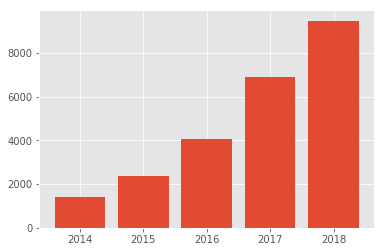

In [12]:
plt.style.use('ggplot')
year2018 = data[data["date"].str.contains("2018/", na=False)]
year2017 = data[data["date"].str.contains("2017/", na=False)]
year2016 = data[data["date"].str.contains("2016/", na=False)]
year2015 = data[data["date"].str.contains("2015/", na=False)]
year2014 = data[data["date"].str.contains("2014/", na=False)]
bm_2018 = year2018["bookmarks"].sum()
bm_2017 = year2017["bookmarks"].sum()
bm_2016 = year2016["bookmarks"].sum()
bm_2015 = year2015["bookmarks"].sum()
bm_2014 = year2014["bookmarks"].sum()

left = np.array([1, 2, 3, 4, 5])
label = ["2014", "2015", "2016", "2017", "2018"]
height = np.array([bm_2014, bm_2015, bm_2016, bm_2017, bm_2018])
plt.bar(left, height, tick_label=label, align="center")
plt.show()

In [15]:
print(bm_2014)
print(bm_2015)
print(bm_2016)
print(bm_2017)
print(bm_2018)

1410
2381
4059
6910
9482


ブックマークのヒストグラム

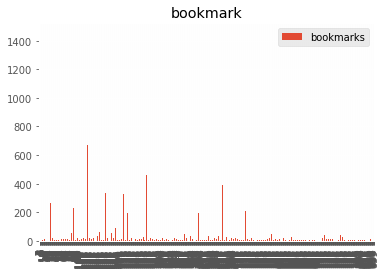

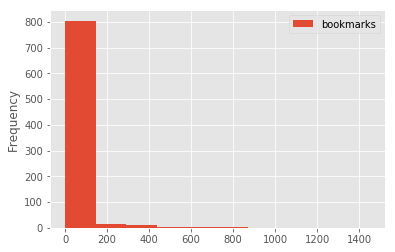

In [13]:
df_bm = data.iloc[:, [1]]
df_bm.plot.bar()
plt.title('bookmark')
df_bm.plot(kind='hist')
plt.show()